Model Accuracy: 0.9997466430200151
              precision    recall  f1-score   support

  Aggressive       1.00      1.00      1.00      5319
    Moderate       1.00      1.00      1.00      1209
        Safe       1.00      1.00      1.00      1366

    accuracy                           1.00      7894
   macro avg       1.00      1.00      1.00      7894
weighted avg       1.00      1.00      1.00      7894



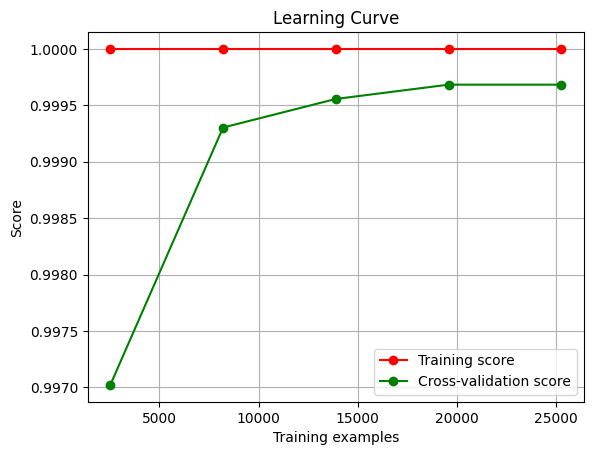

In [1]:
import pandas as pd
import numpy as np  # Import numpy for np.linspace
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import joblib

def plot_learning_curve(estimator, X, y):
    """Plot learning curve for the given estimator."""
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1, 
                                                            train_sizes=np.linspace(0.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title('Learning Curve')
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    plt.savefig('../data/learning_curve.png')
    plt.show()

def train_model(data_path):
    """Train the RandomForestClassifier model and save it."""
    df = pd.read_csv(data_path)
    
    # Categorization logic, including heading change
    def categorize(row):
        if row['Speed(m/s)'] < 10 and row['Jerk(m/s^3)'] < 0.5 and row['Heading_Change(degrees)'] < 5:
            return 'Safe'
        elif row['Speed(m/s)'] < 15 and row['Jerk(m/s^3)'] < 1 and row['Heading_Change(degrees)'] < 10:
            return 'Moderate'
        else:
            return 'Aggressive'
    
    df['Category'] = df.apply(categorize, axis=1)
    
    X = df.drop(columns=['TripId', 'Category'])
    y = df['Category']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print("Model Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Plot learning curve
    plot_learning_curve(model, X_train, y_train)
    
    joblib.dump(model, '../models/driving_behavior_model.pkl')

if __name__ == "__main__":
    train_model('../data/processed_data.csv')
